# Transformation
 Aim: data transformation need in gradiant descent and many algorithms
     like-knn,linear regression,svm etc.
       Deep learning :- RNN,CNN,ANN
 
  - various type of transformation:
     - standarization of data (standardScaler) 
     - scaling to min and max (MinMaxScaler)
     - scaling to median and quartiles (RobustScaler)
     - Gaussian Transformation
      - Logarithmic Transformation
      - Exponential Transformation
      - Reciprocal Transformation
      - Sqaure Root Transformation
      - Boxcox Transformation

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("mobile_train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
X=data.iloc[:,:-1]
Y = data["price_range"]

###   StandardScaler
  - Aim:it is transform data between -2 to 2
  - Formula:
   $$z=(x-x_{mean})/std$$

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
st = StandardScaler()
X_st = st.fit_transform(X)

In [8]:
X_st

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

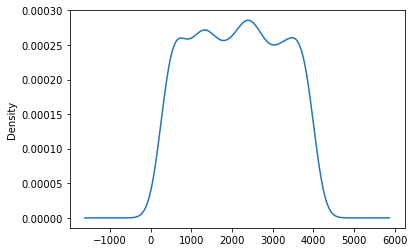

In [9]:
data.iloc[:,13].plot(kind="kde")

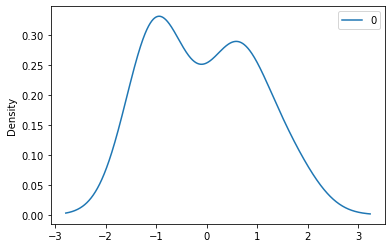

In [10]:
pd.DataFrame(X_st[13]).plot(kind="kde")

### MinMaxScaler
 - Aim:it is data transform between 0 to 1
 - Formula:
   $$x_{minmax}=(x-x_{min})/(x_{max}-x_{min})$$ 

In [11]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)
X_minmax

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

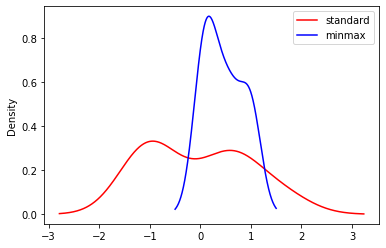

In [12]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
pd.DataFrame(X_st[13]).plot(kind="kde",ax=ax,color="red")
pd.DataFrame(X_minmax[13]).plot(kind="kde",ax=ax,color="blue")
plt.legend(["standard","minmax"])
plt.show()

### RobustScaler
 - Aim:it is data transform between -1 to 1
 - Formula:
   $$x_{Robust}=(x-x_{median})/IQR$$ 
   $$IQR=Q_{3}-Q_{1}$$    where Q is quartiles

In [13]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_rbs=rbs.fit_transform(X)

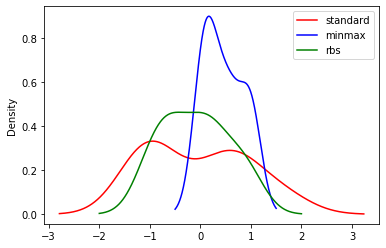

In [14]:
ax = plt.subplot(111)
pd.DataFrame(X_st[13]).plot(kind="kde",ax=ax,color="red")
pd.DataFrame(X_minmax[13]).plot(kind="kde",ax=ax,color="blue")
pd.DataFrame(X_rbs[13]).plot(kind="kde",ax=ax,color="green")
plt.legend(["standard","minmax","rbs"])
plt.show()

## Gaussian Transformation

### Logarithmic transformation
  - Aim:this transformation try to transform data in Gaussian destribution using Logarithmic function
  - Formula:
   $$f(x) = log(x)$$ 

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([ 256,  258,  258, ..., 3993, 3996, 3998], dtype=int64)),
 (1061.754923565367, 2124.213, 0.9775851705245361))

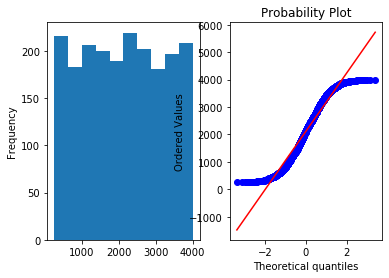

In [15]:
import pylab 
import scipy.stats as stats
plt.subplot(1,2,1)
X["ram"].plot(kind="hist")
plt.subplot(1,2,2)
stats.probplot(X["ram"], dist="norm", plot=pylab)

In [16]:
X_log = np.log(X["ram"])

- Q-Q plot

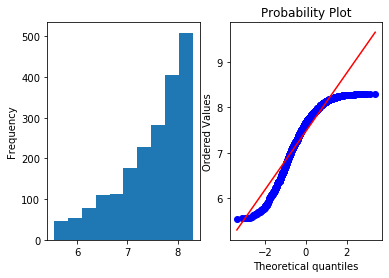

In [17]:
plt.subplot(1,2,1)
X_log.plot(kind="hist")
plt.subplot(1,2,2)
stats.probplot(X_log, dist="norm", plot=pylab)
pylab.show()

### Exponential transformation
  - Aim:this transformation try to transform data in Gaussian destribution using Exponential function
  - Formula:
   $$f(x) = a^x$$ 

In [18]:
X_exp = X.ram**(1/1.2)

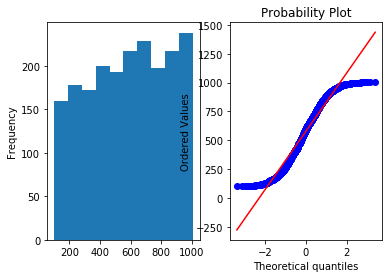

In [19]:
plt.subplot(1,2,1)
X_exp.plot(kind="hist")
plt.subplot(1,2,2)
stats.probplot(X_exp, dist="norm", plot=pylab)
pylab.show()

### Reciprocal transformation
  - Aim:this transformation try to transform data in Gaussian destribution using Reciprocal function
  - Formula:
   $$f(x) = 1/x$$ 

In [20]:
X_reci = 1/X.ram

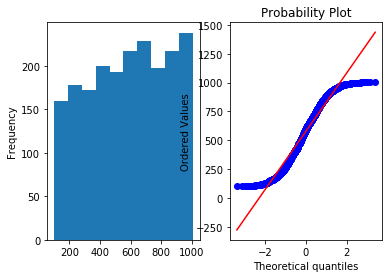

In [21]:
plt.subplot(1,2,1)
X_exp.plot(kind="hist")
plt.subplot(1,2,2)
stats.probplot(X_exp, dist="norm", plot=pylab)
pylab.show()

### Square Root transformation
  - Aim:this transformation try to transform data in Gaussian destribution using Square Root function
  - Formula:
   $$f(x) = \sqrt{x}$$ 

In [22]:
X_root = X.ram**(0.5)

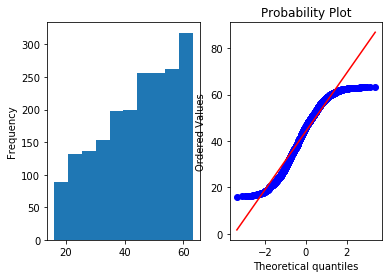

In [23]:
plt.subplot(1,2,1)
X_root.plot(kind="hist")
plt.subplot(1,2,2)
stats.probplot(X_root, dist="norm", plot=pylab)
pylab.show()

### Boxcox transformation
  - Aim:this transformation try to transform data in Gaussian destribution
  - Formula:
            f(x) = (x**lmbda - 1) /lmbda,  for  lmbda > 0  
                   log(x),                  for  lmbda = 0
             
            

In [24]:
X_boxcox,param = stats.boxcox(X.ram)
pd.DataFrame(X_boxcox)

,0
0,420.233199
1,430.099215
2,426.739774
3,446.518333
4,272.324061
...,...
1995,157.125473
1996,355.889080
1997,480.093826
1998,190.708135


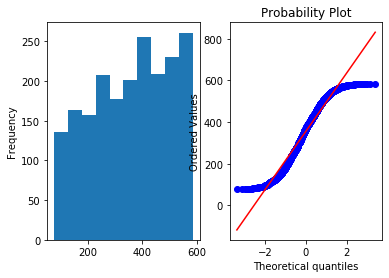

In [25]:
plt.subplot(1,2,1)
pd.Series(X_boxcox).plot(kind="hist")
plt.subplot(1,2,2)
stats.probplot(X_boxcox, dist="norm", plot=pylab)
pylab.show()